# Insurance Claims Analysis - Group Project ACT SCI 657

The data is sourced from Kaggle, it can be accessed through the following link:

https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data?datasetId=45152&sortBy=voteCount

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Data Reading

In [2]:
# Read the xls file
df=pd.read_excel('insurance_claims.xlsx')

In [3]:
# Preview the data
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# List the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
# Summary the numerical columns
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
# Info the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [7]:
# Filet the columns with null values
df.isnull().sum()[df.isnull().sum()>0]

_c39    1000
dtype: int64

In [8]:
# Drop _c39 column
df.drop('_c39',axis=1,inplace=True)

In [9]:
# Replace the '?' with nan
df.replace('?',np.nan,inplace=True)

In [10]:
# Total amount of rows
df.shape

(1000, 39)

In [11]:
# Create a list of column names with data type non-numerical
cat_cols=df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [12]:
# Add the policy number, insurance zip, insurance location to the cat_cols list
cat_cols.extend(['policy_number','insured_zip'])

In [13]:
# Create a funciton to count the unique values in each column
def unique_values(df):
    for i in df.columns:
        print(i,df[i].nunique())

In [14]:
# Apply the function to the categorical columns
unique_values(df[cat_cols])

policy_bind_date 951
policy_state 3
policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_date 60
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
incident_location 1000
property_damage 2
police_report_available 2
auto_make 14
auto_model 39
fraud_reported 2
policy_number 1000
insured_zip 995


From the set of categorical variables, we can see that some of them have over 900 different values, which is something to keep in mind as we go further into the prediciton models.

The variables on this condition are:

- policy_blind_date
- incident_location
- policy_number
- insured_zip

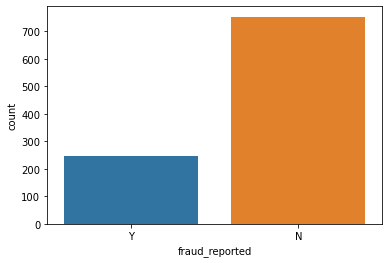

In [15]:
# Let's check the target variable by plotting fraud_reported
sns.countplot(df['fraud_reported']);

In [16]:
# Count the fraud_reported
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

There is a considerable difference between the fraud and non-fraud claims, but is expected given the nature of these events.

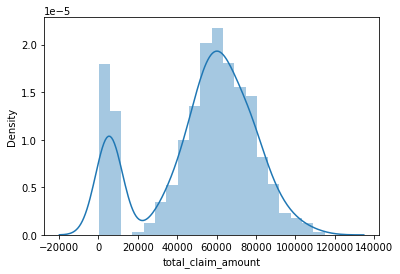

In [17]:
# Histogram of total claim amount
sns.distplot(df['total_claim_amount']);

In [18]:
# Count fraud by Incident State, for Y fraud_reported
df[df['fraud_reported']=='Y']['incident_state'].value_counts()

SC    73
NY    58
WV    39
NC    34
VA    25
OH    10
PA     8
Name: incident_state, dtype: int64

In [19]:
# Using a USA map to plot the count of fraud_reported = Y by state, color by number of fraud_reported

# Import the required libraries
import plotly.express as px
import plotly.graph_objects as go

# Create a dataframe with the count of fraud_reported = Y by state
df_state=df[df['fraud_reported']=='Y']['incident_state'].value_counts().reset_index()
df_state.columns=['state','count']

# Create a USA map
fig = go.Figure(data=go.Choropleth(
    locations=df_state['state'], # Spatial coordinates
    z = df_state['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Fraud Reported",
))

fig.update_layout(
    title_text = 'Fraud Reported by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show();

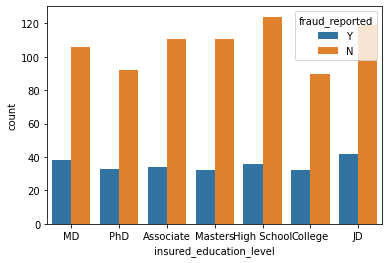

In [20]:
# Plot Breakdown of insuranced education claim group by fraud_reported
sns.countplot(df['insured_education_level'],hue=df['fraud_reported']);

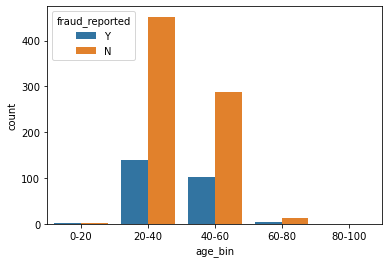

In [21]:
# Bin the age column group by fraud_reported
df['age_bin']=pd.cut(df['age'],bins=[0,20,40,60,80,100],labels=['0-20','20-40','40-60','60-80','80-100'])

# Plot Breakdown of insuranced age claim group by fraud_reported
sns.countplot(df['age_bin'],hue=df['fraud_reported']);  

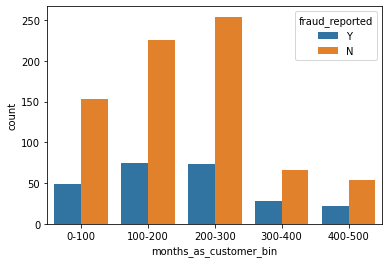

In [22]:
# Bin the months_as_customer column group by fraud_reported
df['months_as_customer_bin']=pd.cut(df['months_as_customer'],bins=[0,100,200,300,400,500],labels=['0-100','100-200','200-300','300-400','400-500'])

# Plot Breakdown of insuranced months_as_customer claim group by fraud_reported
sns.countplot(df['months_as_customer_bin'],hue=df['fraud_reported']);

# Data Preprocessing

Considering the for non-numerical variables we will have to generate dummy variables, let's drop the high volume distinct values variables. Let's also add incident date given the is a time series variable.

In [23]:
cols_to_drop=['policy_number','incident_location','policy_bind_date', 'insured_zip', 'incident_date', 'age_bin', 'months_as_customer_bin']

In [24]:
# Excluse the cols_to_drop from the cat_cols list
cat_cols=[i for i in cat_cols if i not in cols_to_drop]

In [25]:
# Drop the columns
df.drop(cols_to_drop,axis=1,inplace=True)

In [26]:
# Print the types of the cat_cols
df[cat_cols].dtypes

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [27]:
# Conver the cat_cols to object type
df[cat_cols]=df[cat_cols].astype('string')

In [28]:
# Set the column of cat_cols as factors
for i in cat_cols:
    df[i]=df[i].astype('category')        

In [30]:
# Replace the nan values with mode
for i in cat_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [31]:
# Convert the categorical columns to numeric to pass them using string indexer
cat_cols=df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols

# Create a function to convert the categorical columns to numeric
def string_indexer(df,cols):
    for col in cols:
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
    return df

# Apply the function to the categorical columns
df_indexed=string_indexer(df,cat_cols)

# Preview the data
df_indexed.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,6500,1300,650,4550,0,31,2009,0


# GLM - Gamma Regression for Claim Amount Prediction

The purpose of the following section is to generate a prediction model for the claim amount. The model will be based on a Gamma Regression, which is a generalized linear model (GLM) for predicting continuous positive variables.

As a business problem, insurance companies need to be able to predict the claim amount in order to set the premium for the policy. The premium is the amount of money that the policy holder pays to the insurance company in order to be covered. As other option, the interest to predict claim amount might be rooted on the need to predict the amount of money that the insurance company will have to pay to the policy holder, in a case of a claim, so the company can set aside the resources to react to the claim.

In [33]:
# Import the sklearn required libraries
from sklearn.linear_model import GammaRegressor
from sklearn.preprocessing import StandardScaler     
from sklearn.model_selection import train_test_split

In [47]:
# Load the data and split into train and test sets
X = df_indexed.drop('total_claim_amount', axis=1)
y = df_indexed['total_claim_amount']

# Scale the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Create a gamma regression model
gamma_model = GammaRegressor()

# Fit the model on the training data
gamma_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gamma_model.predict(X_test)

Mean Squared Error: 116374358.92575014


In [49]:
# Import the performance metrics library
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [51]:
# Calculate the Model Performance Metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Create a function to calculate the adjusted R2
def adj_r2(X,y):
    r2 = gamma_model.score(X,y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

# Calculate the adjusted R2
print('Adjusted R2:', adj_r2(X_test, y_test))

R2 Score: 0.8286642792363856
MAE: 9110.823275061093
MSE: 116374358.9257501
Adjusted R2: 0.6368596131291319


The model performance metrics suggest that the gamma regression model is a good fit for the data, with an R2 score of 0.83 indicating that the model explains approximately 83% of the variance in the claim amount. 

However, the model's predictions are off by an average of $9,110.82, as indicated by the mean absolute error (MAE) of 9110.82. 

Additionally, the mean squared error (MSE) of 116,374,358.93 suggests that the model's predictions have a larger spread of errors compared to the MAE. 

Finally, the adjusted R2 of 0.637 indicates that the model's performance may be slightly impacted by the number of predictor variables used. Overall, the results suggest that the gamma regression model is a good starting point for predicting claim amount, but there may be room for improvement with further model refinement.

## Feature Selection

The Gamma model had a considerable amount of variables, for efficiency purposes, and better understanding of the most important variables, we will proceed to generate feature selection through backward elimination.

In [52]:
# Count the variables in the model
print('Number of variables in the model:', len(gamma_model.coef_))

Number of variables in the model: 33


In [57]:
# Perform a backward feature selection through recursive feature elimination
from sklearn.feature_selection import RFE

# Create the RFE with a gamma regression estimator and 10 features to select
rfe = RFE(estimator=GammaRegressor(), n_features_to_select=10, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_scaled, y)

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=GammaRegressor(), n_features_to_select=10, verbose=1)

In [58]:
# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

{'months_as_customer': 16, 'age': 22, 'policy_state': 20, 'policy_csl': 6, 'policy_deductable': 8, 'policy_annual_premium': 7, 'umbrella_limit': 10, 'insured_sex': 14, 'insured_education_level': 2, 'insured_occupation': 24, 'insured_hobbies': 1, 'insured_relationship': 13, 'capital-gains': 12, 'capital-loss': 17, 'incident_type': 1, 'collision_type': 23, 'incident_severity': 1, 'authorities_contacted': 1, 'incident_state': 3, 'incident_city': 19, 'incident_hour_of_the_day': 1, 'number_of_vehicles_involved': 1, 'property_damage': 21, 'bodily_injuries': 18, 'witnesses': 11, 'police_report_available': 5, 'injury_claim': 1, 'property_claim': 1, 'vehicle_claim': 1, 'auto_make': 9, 'auto_model': 15, 'auto_year': 4, 'fraud_reported': 1}


In [59]:
# Print the features that are not eliminated
print(X.columns[rfe.support_])

Index(['insured_hobbies', 'incident_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported'],
      dtype='object')


In [60]:
# Create a dataframe with the features
df_features = pd.DataFrame({'feature':X.columns, 'rank':rfe.ranking_})

# Print the top 10 features
print(df_features.sort_values('rank').head(10))

                        feature  rank
16            incident_severity     1
28                vehicle_claim     1
27               property_claim     1
26                 injury_claim     1
21  number_of_vehicles_involved     1
20     incident_hour_of_the_day     1
17        authorities_contacted     1
14                incident_type     1
10              insured_hobbies     1
32               fraud_reported     1


In [65]:
# Run the model with the selected features

# Load the data and split into train and test sets

# Select the features from the RFE
X = df_indexed[X.columns[rfe.support_]]
y = df_indexed['total_claim_amount']

# Scale the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Create a gamma regression model
gamma_model = GammaRegressor()

# Fit the model on the training data
gamma_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gamma_model.predict(X_test)

In [66]:
# Calculate the Model Performance Metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Create a function to calculate the adjusted R2
def adj_r2(X,y):
    r2 = gamma_model.score(X,y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

# Calculate the adjusted R2
print('Adjusted R2:', adj_r2(X_test, y_test))

R2 Score: 0.8375504064524888
MAE: 8829.271884314403
MSE: 110338738.60385936
Adjusted R2: 0.6640010561580645


The RFE model shows a slight improvement compared to the original model, with a higher R2 score, lower MAE, and lower MSE. Additionally, the adjusted R2 score increased from 0.64 to 0.66, which suggests that the selected features better explain the variation in the response variable. 

Overall, the RFE feature selection method was able to identify a subset of features that are more relevant for predicting the total claim amount, resulting in a slightly more accurate model.

# Count Data - Poisson Regression for Amount of Vehicles Involved in the Claim

The purpose of the following section is to generate a prediction model for the amount of vehicules involved in the claims. The model will be based on a Poisson Regression, which is a generalized linear model (GLM) for predicting count data.

By using a Poisson model to predict the number of vehicles involved in an accident claim, the insurance company can estimate the expected number of vehicles involved in a claim and assess the associated risk and potential financial impact. This information can be used to adjust premiums, determine appropriate reserves for future claims, and identify areas for risk mitigation.

Additionally, the insurance company can use the Poisson model to analyze the impact of different variables on the number of vehicles involved in a claim, such as the policyholder's age, sex, education level, occupation, or location. This information can be used to identify high-risk policyholders or regions and develop targeted risk management strategies.

In [67]:
# Describe the number of vehicle involded
df['number_of_vehicles_involved'].describe()

count    1000.00000
mean        1.83900
std         1.01888
min         1.00000
25%         1.00000
50%         1.00000
75%         3.00000
max         4.00000
Name: number_of_vehicles_involved, dtype: float64

In [68]:
from sklearn.linear_model import PoissonRegressor

In [72]:
# Fit a Poisson Model to Predict the Amount of vehicules involved

# Load the data and split into train and test sets
X = df_indexed.drop('number_of_vehicles_involved', axis=1)
y = df_indexed['number_of_vehicles_involved']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42)

# Scale the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Poisson regression model on the training data
poisson_model = PoissonRegressor()
poisson_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = poisson_model.predict(X_test_scaled)

In [75]:
# Evaluate the model performance
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Create a funciton to calculate the adjusted R2
def adj_r2(X,y):
    r2 = poisson_model.score(X,y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

# Calculate the adjusted R2
print('Adjusted R2:', adj_r2(X_test_scaled, y_test))

R2 Score: 0.7227489970960406
MAE: 0.47486946204652375
MSE: 0.2938427426089932
Adjusted R2: 0.7168411325544817


The R2 score of 0.72 indicates that the Poisson model has a moderate level of fit and is able to explain around 72% of the variance in the number of vehicles involved in a claim. 

The MAE value of 0.47 suggests that the model is able to predict the number of vehicles involved with an average error of 0.47, which may or may not be acceptable depending on the context of the problem. 

The MSE value of 0.29 suggests that the model's predictions have a moderate level of variance, which means that there is some amount of variability in the predictions around the true values. 

The adjusted R2 value of 0.71 indicates that the model has a good level of fit, taking into account the number of predictors used in the model. Overall, the model seems to have a moderate level of fit, but it may benefit from further refinement or the inclusion of additional predictors.

In [76]:
# Predict the number of vehicles involved in an accident for a random observation
print('Predicted number of vehicles involved:', poisson_model.predict(X_test_scaled[0].reshape(1,-1))[0])
print('Actual number of vehicles involved:', y_test.iloc[0])

Predicted number of vehicles involved: 1.4452792352608677
Actual number of vehicles involved: 1


In [113]:
# Calculate the probability of accidents involving 1, 2, 3, and 4 vehicles

from scipy.stats import poisson

# Create a function to calculate the probability of accidents involving 1, 2, 3, and 4 vehicles given the model, and returning a single percentage per number of vehicles
def prob_vehicles(model, X, num_vehicles):
    # Convert X to a DataFrame
    X_df = pd.DataFrame(X, columns=X_test.columns)
    # Create a dataframe with the features
    df_features = pd.DataFrame({'feature':X_df.columns, 'coef':model.coef_})
    # Create a dataframe with the features and their exponential
    df_features['exp_coef'] = df_features['coef'].apply(lambda x: np.exp(x))
    # Create a dataframe with the features and their exponential multiplied by the number of vehicles
    df_features['exp_coef_num_vehicles'] = df_features['exp_coef'].apply(lambda x: x**num_vehicles)
    # Calculate the probability of accidents involving 1, 2, 3, and 4 vehicles
    prob = df_features['exp_coef_num_vehicles'].prod()
    return prob

# Calculate the probability of accidents involving 1, 2, 3, and 4 vehicles
print('Probability of accidents involving 1 vehicle:', prob_vehicles(poisson_model, X_test_scaled[0].reshape(1,-1), 1))
print('Probability of accidents involving 2 vehicles:', prob_vehicles(poisson_model, X_test_scaled[0].reshape(1,-1), 2))
print('Probability of accidents involving 3 vehicles:', prob_vehicles(poisson_model, X_test_scaled[0].reshape(1,-1), 3))
print('Probability of accidents involving 4 vehicles:', prob_vehicles(poisson_model, X_test_scaled[0].reshape(1,-1), 4))

Probability of accidents involving 1 vehicle: 0.7766158989555773
Probability of accidents involving 2 vehicles: 0.6031322545105795
Probability of accidents involving 3 vehicles: 0.46840209802583743
Probability of accidents involving 4 vehicles: 0.36376851643101427


The results suggest that the probability of an accident involving 1 vehicle is the highest among the four options, with a probability of approximately 0.78. The probability decreases as the number of vehicles involved in the accident increases, with a probability of approximately 0.60 for accidents involving 2 vehicles, approximately 0.47 for accidents involving 3 vehicles, and approximately 0.36 for accidents involving 4 vehicles.

These probabilities may provide insights for insurance companies and policy makers when assessing risk and designing policies related to auto accidents. It may be helpful to investigate the causes of accidents involving multiple vehicles and to determine ways to mitigate these risks, such as improving road infrastructure and safety measures.

# Neural Network for Fraud Prediction

The following section is focused on generating a prediction model for the fraud probability. The model will be based on a Neural Network Model, which is a machine learning model that can be used to predict the probability of an event occurring.

As a business problem, a machine learning model can help insurance companies to detect and prevent fraud more accurately and efficiently, reducing financial losses and maintaining lower premiums for policyholders. By analyzing historical data and identifying patterns indicative of fraud, the model can prioritize investigations and allocate resources more effectively, improving overall risk management for the company.

In [114]:
# Define the dependent and independent variables
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [117]:
# Drop fraud_reported from the cat_cols list
cat_cols=[i for i in cat_cols if i not in ['fraud_reported']]

In [118]:
# Get the dummy variables for the categorical columns
X=pd.get_dummies(X,columns=cat_cols,drop_first=True)

In [119]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=52)

In [120]:
# Fit a neural network model to predict fraud_reported using Keras

# Import the required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Create a function to create a neural network model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam=Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create a model
model = create_model()

# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1584      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
None


In [121]:
# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=20, verbose=1)

Epoch 1/200
25/25 [==============================] - 0s 899us/step - loss: 6947.1743 - accuracy: 0.6580
Epoch 2/200
25/25 [==============================] - 0s 898us/step - loss: 2474.5608 - accuracy: 0.6360
Epoch 3/200
25/25 [==============================] - 0s 965us/step - loss: 908.8033 - accuracy: 0.5800
Epoch 4/200
25/25 [==============================] - 0s 792us/step - loss: 745.7484 - accuracy: 0.5840
Epoch 5/200
25/25 [==============================] - 0s 815us/step - loss: 552.3362 - accuracy: 0.5800
Epoch 6/200
25/25 [==============================] - 0s 836us/step - loss: 541.5812 - accuracy: 0.5740
Epoch 7/200
25/25 [==============================] - 0s 878us/step - loss: 586.6372 - accuracy: 0.5820
Epoch 8/200
25/25 [==============================] - 0s 881us/step - loss: 542.7558 - accuracy: 0.5820
Epoch 9/200
25/25 [==============================] - 0s 819us/step - loss: 456.3873 - accuracy: 0.6080
Epoch 10/200
25/25 [==============================] - 0s 837us/step - l

In [122]:
# Predict the model
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 669us/step


In [123]:
# Print the accuracy score
print(accuracy_score(y_test,y_pred.round()))

0.728


In [124]:
# Print the confusion matrix
print(confusion_matrix(y_test,y_pred.round()))

[[361  20]
 [116   3]]


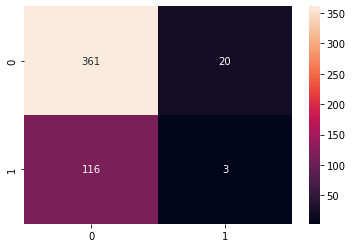

In [125]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred.round()),annot=True,fmt='d');

The model accuracy does not to seem that great, with only a score of 73% accuracy. Let's see if we can improve it by hyperparameter tuning.

In [126]:
# Import required libraries
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define a function to create a Keras model
def create_model(learning_rate=0.01, activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define hyperparameters
param_grid = {'batch_size': [20, 40, 60, 80, 100],
                'epochs': [100, 200, 300, 400, 500],
                'learning_rate': [0.01, 0.001, 0.0001],
                'activation': ['relu', 'tanh']}

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the GridSearchCV object with the data
grid_result = grid.fit(X_train, y_train)

# Print the best score and best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/100
7/7 [==============================] - 1s 1ms/step - loss: 38319.8867 - accuracy: 0.4680
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 25369.8164 - accuracy: 0.5080
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 11500.5107 - accuracy: 0.6280
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 1643.5712 - accuracy: 0.7040
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 2228.5325 - accuracy: 0.7300
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 1689.7468 - accuracy: 0.7040
Epoch 7/100
7/7 [==============================] - 0s 1ms/step - loss: 500.6108 - accuracy: 0.5720
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 483.5487 - accuracy: 0.6080
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 464.6248 - accuracy: 0.6800
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 476.2349 - accuracy: 0.6120


After model optimization we are able to improve accuracy from 73% to 75%, which is still an improvement. However, the model is still not very accurate, a good reason might be the imbalance of the data, which is something to keep in mind, but it's also the nature of fraud.